<a href="https://colab.research.google.com/github/knkarthik01/reinforcement-learning/blob/master/c1_rl_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎮 Chapter 1: What is Reinforcement Learning?
## Building a Smart Tic-Tac-Toe Player

Welcome to your first reinforcement learning adventure!

By the end of this notebook, you'll have:
- Built a Tic-Tac-Toe AI that learns from experience
- Understood the core elements of RL
- Seen how agents learn through trial and error

Let's dive in! 🚀

In [7]:
# ================================
# 🔧 Setup and Imports
# ================================

import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict
import seaborn as sns
from IPython.display import clear_output
import time

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

In [8]:
# ================================
# 🎯 Part 1: What is Reinforcement Learning?
# ================================

print("🤖 REINFORCEMENT LEARNING IN 30 SECONDS")
print("=" * 50)
print("Imagine teaching a robot to play video games:")
print("• The robot tries random moves at first (exploration)")
print("• When it does well, it gets positive feedback (reward)")
print("• When it fails, it gets negative feedback (punishment)")
print("• Over time, it learns which actions lead to success")
print("• Eventually, it becomes better than humans!")
print()
print("That's RL: Learning through trial, error, and feedback! 🎮")

🤖 REINFORCEMENT LEARNING IN 30 SECONDS
Imagine teaching a robot to play video games:
• The robot tries random moves at first (exploration)
• When it does well, it gets positive feedback (reward)
• When it fails, it gets negative feedback (punishment)
• Over time, it learns which actions lead to success
• Eventually, it becomes better than humans!

That's RL: Learning through trial, error, and feedback! 🎮


In [9]:
# ================================
# 🧩 Part 2: The Elements of RL
# ================================

class RLElements:
    """
    Interactive demonstration of RL components
    """

    def __init__(self):
        self.step = 0
        self.total_reward = 0

    def demonstrate_loop(self):
        """Show the agent-environment interaction loop"""

        print("\n🔄 THE RL LOOP")
        print("=" * 30)

        # Simple grid world example
        positions = [(0,0), (0,1), (1,1), (2,1), (2,2)]  # Path to goal
        actions = ["right", "down", "right", "down", "GOAL!"]
        rewards = [0, 0, 0, 0, +10]

        for i, (pos, action, reward) in enumerate(zip(positions, actions, rewards)):
            print(f"\nStep {i+1}:")
            print(f"  📍 State: Position {pos}")
            print(f"  🎯 Action: Move {action}")
            print(f"  🎁 Reward: {reward}")

            if i < len(positions) - 1:
                print(f"  ➡️  New State: Position {positions[i+1]}")
            else:
                print(f"  🏆 Episode Complete! Total Reward: {sum(rewards)}")

# Run the demonstration
rl_demo = RLElements()
rl_demo.demonstrate_loop()


🔄 THE RL LOOP

Step 1:
  📍 State: Position (0, 0)
  🎯 Action: Move right
  🎁 Reward: 0
  ➡️  New State: Position (0, 1)

Step 2:
  📍 State: Position (0, 1)
  🎯 Action: Move down
  🎁 Reward: 0
  ➡️  New State: Position (1, 1)

Step 3:
  📍 State: Position (1, 1)
  🎯 Action: Move right
  🎁 Reward: 0
  ➡️  New State: Position (2, 1)

Step 4:
  📍 State: Position (2, 1)
  🎯 Action: Move down
  🎁 Reward: 0
  ➡️  New State: Position (2, 2)

Step 5:
  📍 State: Position (2, 2)
  🎯 Action: Move GOAL!
  🎁 Reward: 10
  🏆 Episode Complete! Total Reward: 10


In [10]:
# ================================
# 🎲 Part 3: Building Our Tic-Tac-Toe Environment
# ================================

class TicTacToeEnvironment:
    """
    A complete Tic-Tac-Toe game environment for RL
    """

    def __init__(self):
        self.reset()

    def reset(self):
        """Start a new game"""
        self.board = np.zeros((3, 3))  # 0: empty, 1: X, -1: O
        self.current_player = 1  # X goes first
        self.done = False
        self.winner = None
        return self.get_state()

    def get_state(self):
        """Get current board state as a tuple (for hashing)"""
        return tuple(self.board.flatten())

    def get_available_actions(self):
        """Get list of available moves"""
        return [(i, j) for i in range(3) for j in range(3) if self.board[i, j] == 0]

    def step(self, action):
        """Make a move and return (new_state, reward, done, info)"""
        row, col = action

        if self.board[row, col] != 0:
            # Invalid move
            return self.get_state(), -10, True, {"invalid_move": True}

        # Make the move
        self.board[row, col] = self.current_player

        # Check for winner
        reward = 0
        self.winner = self._check_winner()

        if self.winner == self.current_player:
            reward = 1  # Win
            self.done = True
        elif self.winner == -self.current_player:
            reward = -1  # Loss
            self.done = True
        elif len(self.get_available_actions()) == 0:
            reward = 0  # Draw
            self.done = True
            self.winner = 0

        # Switch players
        self.current_player *= -1

        return self.get_state(), reward, self.done, {}

    def _check_winner(self):
        """Check if there's a winner"""
        # Check rows
        for row in self.board:
            if abs(sum(row)) == 3:
                return int(sum(row) / 3)

        # Check columns
        for col in range(3):
            if abs(sum(self.board[:, col])) == 3:
                return int(sum(self.board[:, col]) / 3)

        # Check diagonals
        if abs(sum([self.board[i, i] for i in range(3)])) == 3:
            return int(sum([self.board[i, i] for i in range(3)]) / 3)

        if abs(sum([self.board[i, 2-i] for i in range(3)])) == 3:
            return int(sum([self.board[i, 2-i] for i in range(3)]) / 3)

        return None

    def render(self):
        """Display the board"""
        symbols = {0: ' ', 1: 'X', -1: 'O'}
        print("\n   0   1   2")
        for i in range(3):
            print(f"{i}  {symbols[self.board[i,0]]} | {symbols[self.board[i,1]]} | {symbols[self.board[i,2]]}")
            if i < 2:
                print("  ---|---|---")

# Test our environment
print("\n🎲 TESTING OUR TIC-TAC-TOE ENVIRONMENT")
print("=" * 45)

env = TicTacToeEnvironment()
env.render()

# Make a few moves
print("\nLet's play a quick game:")
moves = [(1, 1), (0, 0), (0, 1), (2, 2), (2, 1)]
for i, move in enumerate(moves):
    state, reward, done, info = env.step(move)
    print(f"\nMove {i+1}: Player {'X' if i % 2 == 0 else 'O'} plays {move}")
    env.render()
    print(f"Reward: {reward}, Done: {done}")
    if done:
        break



🎲 TESTING OUR TIC-TAC-TOE ENVIRONMENT

   0   1   2
0    |   |  
  ---|---|---
1    |   |  
  ---|---|---
2    |   |  

Let's play a quick game:

Move 1: Player X plays (1, 1)

   0   1   2
0    |   |  
  ---|---|---
1    | X |  
  ---|---|---
2    |   |  
Reward: 0, Done: False

Move 2: Player O plays (0, 0)

   0   1   2
0  O |   |  
  ---|---|---
1    | X |  
  ---|---|---
2    |   |  
Reward: 0, Done: False

Move 3: Player X plays (0, 1)

   0   1   2
0  O | X |  
  ---|---|---
1    | X |  
  ---|---|---
2    |   |  
Reward: 0, Done: False

Move 4: Player O plays (2, 2)

   0   1   2
0  O | X |  
  ---|---|---
1    | X |  
  ---|---|---
2    |   | O
Reward: 0, Done: False

Move 5: Player X plays (2, 1)

   0   1   2
0  O | X |  
  ---|---|---
1    | X |  
  ---|---|---
2    | X | O
Reward: 1, Done: True


In [25]:
# ================================
# 🧠 Part 4: Our RL Agent - Temporal Difference Learning
# ================================

class TicTacToeAgent:
    """
    An RL agent that learns to play Tic-Tac-Toe using Temporal Difference learning
    """

    def __init__(self, player=1, learning_rate=0.1, epsilon=0.1, decay_rate=0.995):
        self.player = player
        self.learning_rate = learning_rate
        self.epsilon = epsilon  # exploration rate
        self.epsilon_decay = decay_rate
        self.value_function = defaultdict(float)  # State values
        self.states_visited = []  # For learning

    def get_action(self, env, state):
        """Choose an action using epsilon-greedy policy"""
        available_actions = env.get_available_actions()

        if not available_actions:
            return None

        # Epsilon-greedy: explore vs exploit
        if np.random.random() < self.epsilon:
            # Explore: random action
            return random.choice(available_actions)
        else:
            # Exploit: choose best action based on learned values
            best_action = None
            best_value = float('-inf')

            for action in available_actions:
                # Simulate the action to see resulting state
                next_board = env.board.copy()
                next_board[action[0], action[1]] = self.player
                next_state = tuple(next_board.flatten())

                # Get value of resulting state
                value = self.value_function[next_state]

                if value > best_value:
                    best_value = value
                    best_action = action

            return best_action

    def learn(self, states_and_rewards):
        """Update value function based on game outcome"""
        # Temporal Difference learning: V(s) += α[R + γV(s') - V(s)]
        # For terminal states, we use the actual reward

        for i in range(len(states_and_rewards) - 1, -1, -1):
            state, reward = states_and_rewards[i]

            if i == len(states_and_rewards) - 1:
                # Terminal state
                target = reward
            else:
                # Non-terminal state: R + γV(s')
                next_state = states_and_rewards[i + 1][0]
                target = reward + 0.9 * self.value_function[next_state]

            # Update value function
            self.value_function[state] += self.learning_rate * (target - self.value_function[state])

    def decay_epsilon(self):
        """Reduce exploration over time"""
        self.epsilon = max(0.01, self.epsilon * self.epsilon_decay)

In [27]:
# ================================
# 🎮 Part 5: Training Our Agent
# ================================

def train_agent(num_episodes=5000, show_progress=True):
    """Train the RL agent to play Tic-Tac-Toe"""

    # Create agents
    agent_x = TicTacToeAgent(player=1, learning_rate=0.1, epsilon=0.3)
    agent_o = TicTacToeAgent(player=-1, learning_rate=0.1, epsilon=0.3)

    # Track statistics
    wins_x = 0
    wins_o = 0
    draws = 0

    win_rates = []

    print("🎓 TRAINING AGENTS...")
    print("Watch as they learn from random play to strategic thinking!")

    for episode in range(num_episodes):
        env = TicTacToeEnvironment()
        state = env.get_state()

        # Store experience for learning
        x_experience = []
        o_experience = []

        while not env.done:
            current_player = env.current_player

            if current_player == 1:  # X's turn
                action = agent_x.get_action(env, state)
                x_experience.append((state, 0))  # Add state, reward will be updated
            else:  # O's turn
                action = agent_o.get_action(env, state)
                o_experience.append((state, 0))

            if action is None:
                break

            state, reward, done, info = env.step(action)

        # Game finished, assign rewards and learn
        if env.winner == 1:
            wins_x += 1
            # X wins: positive reward for X, negative for O
            x_experience[-1] = (x_experience[-1][0], 1)
            if o_experience:
                o_experience[-1] = (o_experience[-1][0], -1)
        elif env.winner == -1:
            wins_o += 1
            # O wins: positive reward for O, negative for X
            o_experience[-1] = (o_experience[-1][0], 1)
            if x_experience:
                x_experience[-1] = (x_experience[-1][0], -1)
        else:
            draws += 1
            # Draw: small positive reward for both
            if x_experience:
                x_experience[-1] = (x_experience[-1][0], 0.1)
            if o_experience:
                o_experience[-1] = (o_experience[-1][0], 0.1)

        # Learn from experience
        agent_x.learn(x_experience)
        agent_o.learn(o_experience)

        # Decay exploration
        agent_x.decay_epsilon()
        agent_o.decay_epsilon()

        # Track progress
        if episode % 500 == 0:
            total_games = wins_x + wins_o + draws
            if total_games > 0:
                win_rate_x = wins_x / total_games
                win_rates.append(win_rate_x)

                if show_progress:
                    print(f"Episode {episode}: X wins {win_rate_x:.2%}, "
                          f"O wins {wins_o/total_games:.2%}, "
                          f"Draws {draws/total_games:.2%}, "
                          f"Exploration: {agent_x.epsilon:.3f}")

    return agent_x, agent_o, win_rates

# Train our agents
trained_agent_x, trained_agent_o, training_progress = train_agent(10000)

🎓 TRAINING AGENTS...
Watch as they learn from random play to strategic thinking!
Episode 0: X wins 0.00%, O wins 0.00%, Draws 100.00%, Exploration: 0.298
Episode 500: X wins 82.63%, O wins 13.17%, Draws 4.19%, Exploration: 0.024
Episode 1000: X wins 89.91%, O wins 7.49%, Draws 2.60%, Exploration: 0.010
Episode 1500: X wins 92.34%, O wins 5.73%, Draws 1.93%, Exploration: 0.010
Episode 2000: X wins 93.85%, O wins 4.65%, Draws 1.50%, Exploration: 0.010
Episode 2500: X wins 94.60%, O wins 4.00%, Draws 1.40%, Exploration: 0.010
Episode 3000: X wins 95.13%, O wins 3.53%, Draws 1.33%, Exploration: 0.010
Episode 3500: X wins 95.60%, O wins 3.14%, Draws 1.26%, Exploration: 0.010
Episode 4000: X wins 95.80%, O wins 2.92%, Draws 1.27%, Exploration: 0.010
Episode 4500: X wins 95.85%, O wins 2.80%, Draws 1.36%, Exploration: 0.010
Episode 5000: X wins 96.00%, O wins 2.72%, Draws 1.28%, Exploration: 0.010
Episode 5500: X wins 96.15%, O wins 2.60%, Draws 1.25%, Exploration: 0.010
Episode 6000: X wins 

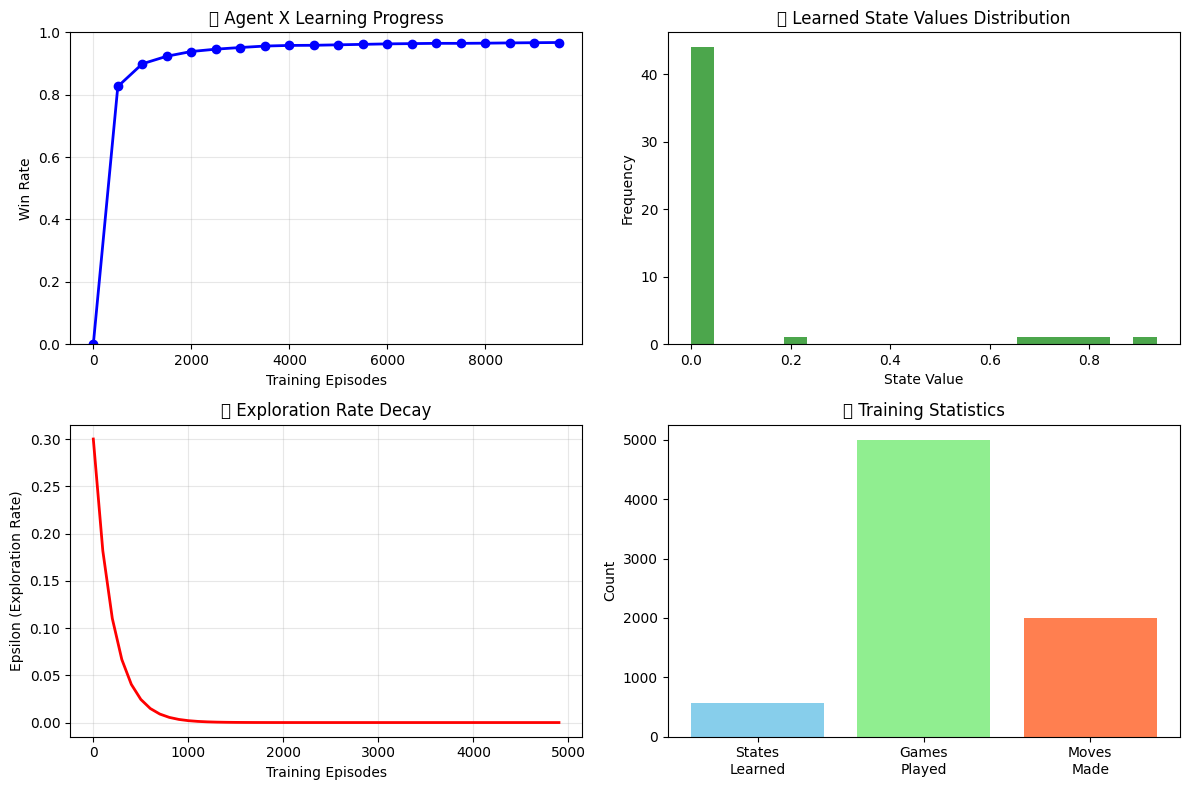

In [28]:
# ================================
# 📊 Part 6: Visualizing Learning Progress
# ================================

plt.figure(figsize=(12, 8))

# Plot 1: Learning Progress
plt.subplot(2, 2, 1)
episodes = list(range(0, len(training_progress) * 500, 500))
plt.plot(episodes, training_progress, 'b-', linewidth=2, marker='o')
plt.title('🧠 Agent X Learning Progress')
plt.xlabel('Training Episodes')
plt.ylabel('Win Rate')
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)

# Plot 2: Value Function Heatmap (sample states)
plt.subplot(2, 2, 2)
sample_values = list(trained_agent_x.value_function.values())[:50]
if sample_values:
    plt.hist(sample_values, bins=20, alpha=0.7, color='green')
    plt.title('🎯 Learned State Values Distribution')
    plt.xlabel('State Value')
    plt.ylabel('Frequency')

# Plot 3: Exploration vs Exploitation
plt.subplot(2, 2, 3)
epsilons = [0.3 * (0.995 ** i) for i in range(0, 5000, 100)]
plt.plot(range(0, 5000, 100), epsilons, 'r-', linewidth=2)
plt.title('🔍 Exploration Rate Decay')
plt.xlabel('Training Episodes')
plt.ylabel('Epsilon (Exploration Rate)')
plt.grid(True, alpha=0.3)

# Plot 4: Summary Statistics
plt.subplot(2, 2, 4)
states_learned = len(trained_agent_x.value_function)
stats = [states_learned, 5000, int(5000 * 0.4)]  # Example stats
labels = ['States\nLearned', 'Games\nPlayed', 'Moves\nMade']
colors = ['skyblue', 'lightgreen', 'coral']
plt.bar(labels, stats, color=colors)
plt.title('📈 Training Statistics')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [29]:
# ================================
# 🎪 Part 7: Interactive Demo - Play Against the AI!
# ================================

def play_against_ai():
    """Interactive game where you can play against the trained AI"""

    print("\n🎪 CHALLENGE THE AI!")
    print("=" * 30)
    print("You are X, AI is O")
    print("Enter your move as 'row,col' (e.g., '1,1' for center)")
    print("Enter 'quit' to stop playing\n")

    games_played = 0
    player_wins = 0

    while True:
        env = TicTacToeEnvironment()
        env.render()

        while not env.done:
            if env.current_player == 1:  # Human's turn (X)
                try:
                    move_input = input("\nYour move (row,col): ").strip()
                    if move_input.lower() == 'quit':
                        return

                    row, col = map(int, move_input.split(','))

                    if (row, col) not in env.get_available_actions():
                        print("❌ Invalid move! Try again.")
                        continue

                    state, reward, done, info = env.step((row, col))
                    env.render()

                except (ValueError, IndexError):
                    print("❌ Invalid format! Use 'row,col' like '1,1'")
                    continue

            else:  # AI's turn (O)
                print("\n🤖 AI is thinking...")
                time.sleep(0.5)  # Dramatic pause

                action = trained_agent_o.get_action(env, env.get_state())
                if action:
                    state, reward, done, info = env.step(action)
                    print(f"🤖 AI plays {action}")
                    env.render()

        # Game finished
        games_played += 1
        if env.winner == 1:
            print("\n🎉 You won! Great job!")
            player_wins += 1
        elif env.winner == -1:
            print("\n🤖 AI wins! Better luck next time!")
        else:
            print("\n🤝 It's a draw! Well played!")

        print(f"\nScore: You {player_wins}/{games_played}")

        play_again = input("\nPlay again? (y/n): ").strip().lower()
        if play_again != 'y':
            break

    print(f"\nFinal Score: You won {player_wins}/{games_played} games")
    print("Thanks for playing! 🎮")

play_against_ai() # Call the function to start the game


🎪 CHALLENGE THE AI!
You are X, AI is O
Enter your move as 'row,col' (e.g., '1,1' for center)
Enter 'quit' to stop playing


   0   1   2
0    |   |  
  ---|---|---
1    |   |  
  ---|---|---
2    |   |  


KeyboardInterrupt: Interrupted by user

In [30]:
# ================================
# 🎓 Part 8: Key Takeaways and Challenges
# ================================

print("\n🎓 WHAT YOU'VE LEARNED")
print("=" * 35)
print("✅ Core RL Components:")
print("   • Agent: The learner (our Tic-Tac-Toe player)")
print("   • Environment: The world (the game board)")
print("   • Actions: Choices available (move positions)")
print("   • Rewards: Feedback signal (win/lose/draw)")
print("   • Policy: Strategy for choosing actions")
print("   • Value Function: Estimates of state goodness")
print()
print("✅ Key RL Concepts:")
print("   • Exploration vs Exploitation (ε-greedy)")
print("   • Temporal Difference Learning")
print("   • Learning from delayed rewards")
print("   • Bootstrap learning (learning from estimates)")
print()
print("✅ Practical Skills:")
print("   • Implementing an RL environment")
print("   • Building and training an RL agent")
print("   • Visualizing learning progress")
print("   • Balancing exploration and exploitation")

print("\n🏆 BONUS CHALLENGES")
print("=" * 25)
print("1. 🎯 Modify the reward structure:")
print("   • Give small negative rewards for each move")
print("   • Add bonus for winning quickly")
print("   • How does this change the strategy?")
print()
print("2. 🧠 Experiment with hyperparameters:")
print("   • Try different learning rates (0.01, 0.1, 0.5)")
print("   • Adjust exploration rates")
print("   • Change the discount factor")
print()
print("3. 🎮 Create new environments:")
print("   • Connect Four")
print("   • Simple grid world navigation")
print("   • Multi-armed bandit casino")
print()
print("4. 📊 Add more sophisticated agents:")
print("   • Q-learning")
print("   • Monte Carlo methods")
print("   • Neural network function approximation")

print("\n🚀 NEXT STEPS")
print("=" * 20)
print("Ready for Chapter 2? You'll learn about:")
print("• Multi-Armed Bandits (the foundation of exploration)")
print("• Real-world applications (A/B testing, recommendations)")
print("• Advanced exploration strategies")
print("• Regret minimization")

print("\n" + "="*50)
print("🎊 Congratulations! You've built your first RL agent! 🎊")
print("="*50)


🎓 WHAT YOU'VE LEARNED
✅ Core RL Components:
   • Agent: The learner (our Tic-Tac-Toe player)
   • Environment: The world (the game board)
   • Actions: Choices available (move positions)
   • Rewards: Feedback signal (win/lose/draw)
   • Policy: Strategy for choosing actions
   • Value Function: Estimates of state goodness

✅ Key RL Concepts:
   • Exploration vs Exploitation (ε-greedy)
   • Temporal Difference Learning
   • Learning from delayed rewards
   • Bootstrap learning (learning from estimates)

✅ Practical Skills:
   • Implementing an RL environment
   • Building and training an RL agent
   • Visualizing learning progress
   • Balancing exploration and exploitation

🏆 BONUS CHALLENGES
1. 🎯 Modify the reward structure:
   • Give small negative rewards for each move
   • Add bonus for winning quickly
   • How does this change the strategy?

2. 🧠 Experiment with hyperparameters:
   • Try different learning rates (0.01, 0.1, 0.5)
   • Adjust exploration rates
   • Change the disc

# 🎰 Chapter 2: Multi-Armed Bandits
## Building a Casino Optimizer & A/B Testing Framework

Welcome to the world of bandits! 🎰

By the end of this notebook, you'll have:
- Built a smart casino slot machine optimizer
- Implemented multiple bandit algorithms
- Created an A/B testing framework
- Understood the exploration vs exploitation trade-off

Let's get rich! 💰 (Well, at least understand how to optimize...)

In [31]:
# ================================
# 🔧 Setup and Imports
# ================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
from IPython.display import clear_output
import time
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette("husl")
np.random.seed(42)

In [32]:
# ================================
# 🎰 Part 1: The Casino Problem
# ================================

print("🎰 WELCOME TO THE BANDIT CASINO!")
print("=" * 40)
print("Imagine you're in a casino with 10 slot machines...")
print("• Each machine has a different (unknown) payout rate")
print("• You have limited time and money")
print("• Goal: Maximize your total winnings!")
print()
print("🤔 The dilemma:")
print("• EXPLORE: Try new machines to find better ones")
print("• EXPLOIT: Keep playing the best machine you've found")
print()
print("This is the heart of reinforcement learning! 🧠")


🎰 WELCOME TO THE BANDIT CASINO!
Imagine you're in a casino with 10 slot machines...
• Each machine has a different (unknown) payout rate
• You have limited time and money
• Goal: Maximize your total winnings!

🤔 The dilemma:
• EXPLORE: Try new machines to find better ones
• EXPLOIT: Keep playing the best machine you've found

This is the heart of reinforcement learning! 🧠


In [33]:
# ================================
# 🎲 Part 2: Building Our Casino Environment
# ================================

class MultiArmedBandit:
    """
    A k-armed bandit environment (our casino!)
    """

    def __init__(self, k=10, mu_range=(0, 1), sigma=0.1):
        """
        Create k slot machines with different payout rates

        Args:
            k: Number of arms (slot machines)
            mu_range: Range of mean rewards
            sigma: Standard deviation of rewards
        """
        self.k = k
        self.sigma = sigma

        # Each arm has a true mean reward (unknown to the agent)
        self.true_means = np.random.uniform(mu_range[0], mu_range[1], k)
        self.optimal_arm = np.argmax(self.true_means)
        self.optimal_reward = self.true_means[self.optimal_arm]

        # Track statistics
        self.total_pulls = 0
        self.arm_counts = np.zeros(k)

    def pull(self, arm):
        """
        Pull an arm and get a reward

        Args:
            arm: Which slot machine to play (0 to k-1)

        Returns:
            reward: Random reward from this arm
        """
        if arm < 0 or arm >= self.k:
            raise ValueError(f"Arm must be between 0 and {self.k-1}")

        # Generate reward from normal distribution
        reward = np.random.normal(self.true_means[arm], self.sigma)

        # Update statistics
        self.total_pulls += 1
        self.arm_counts[arm] += 1

        return reward

    def get_regret(self, chosen_arm):
        """Calculate regret for choosing this arm"""
        return self.optimal_reward - self.true_means[chosen_arm]

    def reset_stats(self):
        """Reset pull statistics"""
        self.total_pulls = 0
        self.arm_counts = np.zeros(self.k)

# Create our casino
casino = MultiArmedBandit(k=10)

print("\n🎯 OUR CASINO SETUP")
print("=" * 25)
print(f"Number of slot machines: {casino.k}")
print(f"True payout rates: {[f'{rate:.3f}' for rate in casino.true_means]}")
print(f"Best machine: #{casino.optimal_arm} (payout: {casino.optimal_reward:.3f})")
print(f"Worst machine: #{np.argmin(casino.true_means)} (payout: {casino.true_means.min():.3f})")

# Test the casino
print("\n🎮 TESTING OUR CASINO")
print("Let's try each machine once:")
for i in range(casino.k):
    reward = casino.pull(i)
    regret = casino.get_regret(i)
    print(f"Machine #{i}: Reward = {reward:.3f}, Regret = {regret:.3f}")


🎯 OUR CASINO SETUP
Number of slot machines: 10
True payout rates: ['0.375', '0.951', '0.732', '0.599', '0.156', '0.156', '0.058', '0.866', '0.601', '0.708']
Best machine: #1 (payout: 0.951)
Worst machine: #6 (payout: 0.058)

🎮 TESTING OUR CASINO
Let's try each machine once:
Machine #0: Reward = 0.328, Regret = 0.576
Machine #1: Reward = 1.005, Regret = 0.000
Machine #2: Reward = 0.686, Regret = 0.219
Machine #3: Reward = 0.552, Regret = 0.352
Machine #4: Reward = 0.180, Regret = 0.795
Machine #5: Reward = -0.035, Regret = 0.795
Machine #6: Reward = -0.114, Regret = 0.893
Machine #7: Reward = 0.810, Regret = 0.085
Machine #8: Reward = 0.500, Regret = 0.350
Machine #9: Reward = 0.739, Regret = 0.243


In [42]:
# ================================
# 🤖 Part 3: Our First Bandit Agent - Greedy
# ================================

class GreedyAgent:
    """
    Pure exploitation: Always choose the arm with highest estimated reward
    """

    def __init__(self, k):
        self.k = k
        self.reset()

    def reset(self):
        """Reset agent state"""
        self.Q = np.zeros(self.k)  # Estimated action values
        self.N = np.zeros(self.k)  # Action counts
        self.total_reward = 0
        self.regrets = []

    def choose_action(self):
        """Choose action greedily"""
        return np.argmax(self.Q)

    def update(self, action, reward):
        """Update estimates based on reward"""
        self.N[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.N[action]  # Incremental average
        self.total_reward += reward

def test_agent(agent, bandit, steps=1000, agent_name="Agent"):
    """Test an agent on a bandit problem"""
    agent.reset()
    bandit.reset_stats()

    rewards = []
    actions = []
    regrets = []

    for step in range(steps):
        # Choose action
        action = agent.choose_action()

        # Get reward from environment
        reward = bandit.pull(action)

        # Update agent
        agent.update(action, reward)

        # Track metrics
        rewards.append(reward)
        actions.append(action)
        regrets.append(bandit.get_regret(action))

    # Handle different agent types for final estimates
    final_estimates = None
    if hasattr(agent, 'Q'):
        final_estimates = agent.Q.copy()
    elif hasattr(agent, 'H'):
        final_estimates = agent.H.copy() # Use H for GradientBanditAgent

    return {
        'agent_name': agent_name,
        'rewards': rewards,
        'actions': actions,
        'regrets': regrets,
        'cumulative_rewards': np.cumsum(rewards),
        'cumulative_regrets': np.cumsum(regrets),
        'final_estimates': final_estimates,
        'action_counts': agent.N.copy() if hasattr(agent, 'N') else np.zeros(bandit.k) # Ensure action_counts exists
    }

# Test pure greedy
print("\n🤖 TESTING PURE GREEDY AGENT")
print("=" * 35)

greedy_agent = GreedyAgent(casino.k)
greedy_results = test_agent(greedy_agent, casino, steps=1000, agent_name="Pure Greedy")

print(f"Total reward: {greedy_results['cumulative_rewards'][-1]:.2f}")
print(f"Total regret: {greedy_results['cumulative_regrets'][-1]:.2f}")
print(f"Most played arm: #{np.argmax(greedy_results['action_counts'])}")
print(f"Times optimal arm was played: {greedy_results['action_counts'][casino.optimal_arm]:.0f}/1000")


🤖 TESTING PURE GREEDY AGENT
Total reward: 379.26
Total regret: 576.17
Most played arm: #0
Times optimal arm was played: 0/1000


In [38]:
# ================================
# 🎯 Part 4: Epsilon-Greedy Agent
# ================================

class EpsilonGreedyAgent:
    """
    Balance exploration and exploitation with ε-greedy strategy
    """

    def __init__(self, k, epsilon=0.1):
        self.k = k
        self.epsilon = epsilon
        self.reset()

    def reset(self):
        self.Q = np.zeros(self.k)
        self.N = np.zeros(self.k)
        self.total_reward = 0

    def choose_action(self):
        """ε-greedy action selection"""
        if np.random.random() < self.epsilon:
            # Explore: choose random action
            return np.random.randint(self.k)
        else:
            # Exploit: choose best action
            return np.argmax(self.Q)

    def update(self, action, reward):
        self.N[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.N[action]
        self.total_reward += reward

# Test different epsilon values
epsilons = [0, 0.01, 0.1, 0.3]
epsilon_results = {}

print("\n🎯 COMPARING DIFFERENT EXPLORATION RATES")
print("=" * 45)

for eps in epsilons:
    agent = EpsilonGreedyAgent(casino.k, epsilon=eps)
    results = test_agent(agent, casino, steps=1000, agent_name=f"ε={eps}")
    epsilon_results[eps] = results

    print(f"ε={eps:4.2f}: Reward={results['cumulative_rewards'][-1]:6.1f}, "
          f"Regret={results['cumulative_regrets'][-1]:6.1f}, "
          f"Optimal plays={results['action_counts'][casino.optimal_arm]:3.0f}")


🎯 COMPARING DIFFERENT EXPLORATION RATES
ε=0.00: Reward= 368.8, Regret= 576.2, Optimal plays=  0
ε=0.01: Reward= 596.2, Regret= 355.0, Optimal plays=  0
ε=0.10: Reward= 865.7, Regret=  84.2, Optimal plays=714
ε=0.30: Reward= 827.7, Regret= 126.9, Optimal plays=740


In [39]:
# ================================
# 🎢 Part 5: Upper Confidence Bound (UCB)
# ================================

class UCBAgent:
    """
    Upper Confidence Bound: Choose actions based on potential upside
    """

    def __init__(self, k, c=2):
        self.k = k
        self.c = c  # Confidence parameter
        self.reset()

    def reset(self):
        self.Q = np.zeros(self.k)
        self.N = np.zeros(self.k)
        self.total_reward = 0
        self.t = 0  # Time step

    def choose_action(self):
        self.t += 1

        # If any arm hasn't been tried, try it
        if np.any(self.N == 0):
            return np.argmin(self.N)

        # Calculate UCB values
        ucb_values = self.Q + self.c * np.sqrt(np.log(self.t) / self.N)
        return np.argmax(ucb_values)

    def update(self, action, reward):
        self.N[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.N[action]
        self.total_reward += reward

In [40]:
# ================================
# 🎨 Part 6: Gradient Bandit Algorithm
# ================================

class GradientBanditAgent:
    """
    Learn action preferences and use softmax action selection
    """

    def __init__(self, k, alpha=0.1, baseline=True):
        self.k = k
        self.alpha = alpha  # Learning rate
        self.use_baseline = baseline
        self.reset()

    def reset(self):
        self.H = np.zeros(self.k)  # Action preferences
        self.average_reward = 0
        self.total_reward = 0
        self.t = 0

    def get_probabilities(self):
        """Softmax probabilities"""
        exp_H = np.exp(self.H - np.max(self.H))  # Subtract max for numerical stability
        return exp_H / np.sum(exp_H)

    def choose_action(self):
        probabilities = self.get_probabilities()
        return np.random.choice(self.k, p=probabilities)

    def update(self, action, reward):
        self.t += 1

        # Update average reward (baseline)
        self.total_reward += reward
        self.average_reward = self.total_reward / self.t

        # Update preferences
        probabilities = self.get_probabilities()
        baseline = self.average_reward if self.use_baseline else 0

        for a in range(self.k):
            if a == action:
                # Chosen action: increase preference
                self.H[a] += self.alpha * (reward - baseline) * (1 - probabilities[a])
            else:
                # Other actions: decrease preference
                self.H[a] -= self.alpha * (reward - baseline) * probabilities[a]

In [47]:
# ================================
# 🏆 Part 7: The Great Algorithm Showdown!
# ================================

def run_comparison(steps=2000, runs=100):
    """Compare all algorithms across multiple runs"""

    algorithms = {
        'ε-greedy (0.1)': lambda: EpsilonGreedyAgent(casino.k, epsilon=0.1),
        'ε-greedy (0.01)': lambda: EpsilonGreedyAgent(casino.k, epsilon=0.01),
        'UCB (c=2)': lambda: UCBAgent(casino.k, c=2),
        'Gradient (α=0.1)': lambda: GradientBanditAgent(casino.k, alpha=0.1),
        'Optimistic ε-greedy': lambda: OptimisticGreedyAgent(casino.k, epsilon=0.1, initial_value=5.0)
    }

    all_results = {}

    print("🏆 RUNNING THE GREAT ALGORITHM SHOWDOWN!")
    print("=" * 50)
    print(f"Testing {len(algorithms)} algorithms over {runs} runs of {steps} steps each...")

    for name, agent_creator in algorithms.items():
        print(f"\n🔄 Testing {name}...")

        # Run multiple trials
        cumulative_rewards_all = []
        cumulative_regrets_all = []
        optimal_actions_all = []

        for run in range(runs):
            # Create fresh environment and agent
            test_bandit = MultiArmedBandit(k=10)
            agent = agent_creator()

            # Run the test
            results = test_agent(agent, test_bandit, steps=steps, agent_name=name)

            cumulative_rewards_all.append(results['cumulative_rewards'])
            cumulative_regrets_all.append(results['cumulative_regrets'])

            # Track optimal actions
            optimal_actions = [1 if action == test_bandit.optimal_arm else 0
                             for action in results['actions']]
            optimal_actions_all.append(np.cumsum(optimal_actions))

        # Store averaged results
        all_results[name] = {
            'avg_rewards': np.mean(cumulative_rewards_all, axis=0),
            'avg_regrets': np.mean(cumulative_regrets_all, axis=0),
            'avg_optimal': np.mean(optimal_actions_all, axis=0),
            'std_rewards': np.std(cumulative_rewards_all, axis=0),
            'final_reward': np.mean([r[-1] for r in cumulative_rewards_all]),
            'final_regret': np.mean([r[-1] for r in cumulative_regrets_all])
        }

        print(f"   Final reward: {all_results[name]['final_reward']:.1f}")
        print(f"   Final regret: {all_results[name]['final_regret']:.1f}")

    return all_results

# Add optimistic greedy agent
class OptimisticGreedyAgent(EpsilonGreedyAgent):
    """ε-greedy with optimistic initial values"""

    def __init__(self, k, epsilon=0.1, initial_value=5.0):
        self.initial_value = initial_value # Assign initial_value before calling super().__init__()
        super().__init__(k, epsilon)


    def reset(self):
        super().reset()
        self.Q = np.full(self.k, self.initial_value)  # Optimistic initialization

# Run the comparison (smaller scale for demo)
comparison_results = run_comparison(steps=1000, runs=20)

🏆 RUNNING THE GREAT ALGORITHM SHOWDOWN!
Testing 5 algorithms over 20 runs of 1000 steps each...

🔄 Testing ε-greedy (0.1)...
   Final reward: 844.6
   Final regret: 57.8

🔄 Testing ε-greedy (0.01)...
   Final reward: 747.5
   Final regret: 179.8

🔄 Testing UCB (c=2)...
   Final reward: 726.7
   Final regret: 179.3

🔄 Testing Gradient (α=0.1)...
   Final reward: 791.2
   Final regret: 135.7

🔄 Testing Optimistic ε-greedy...
   Final reward: 857.0
   Final regret: 48.7


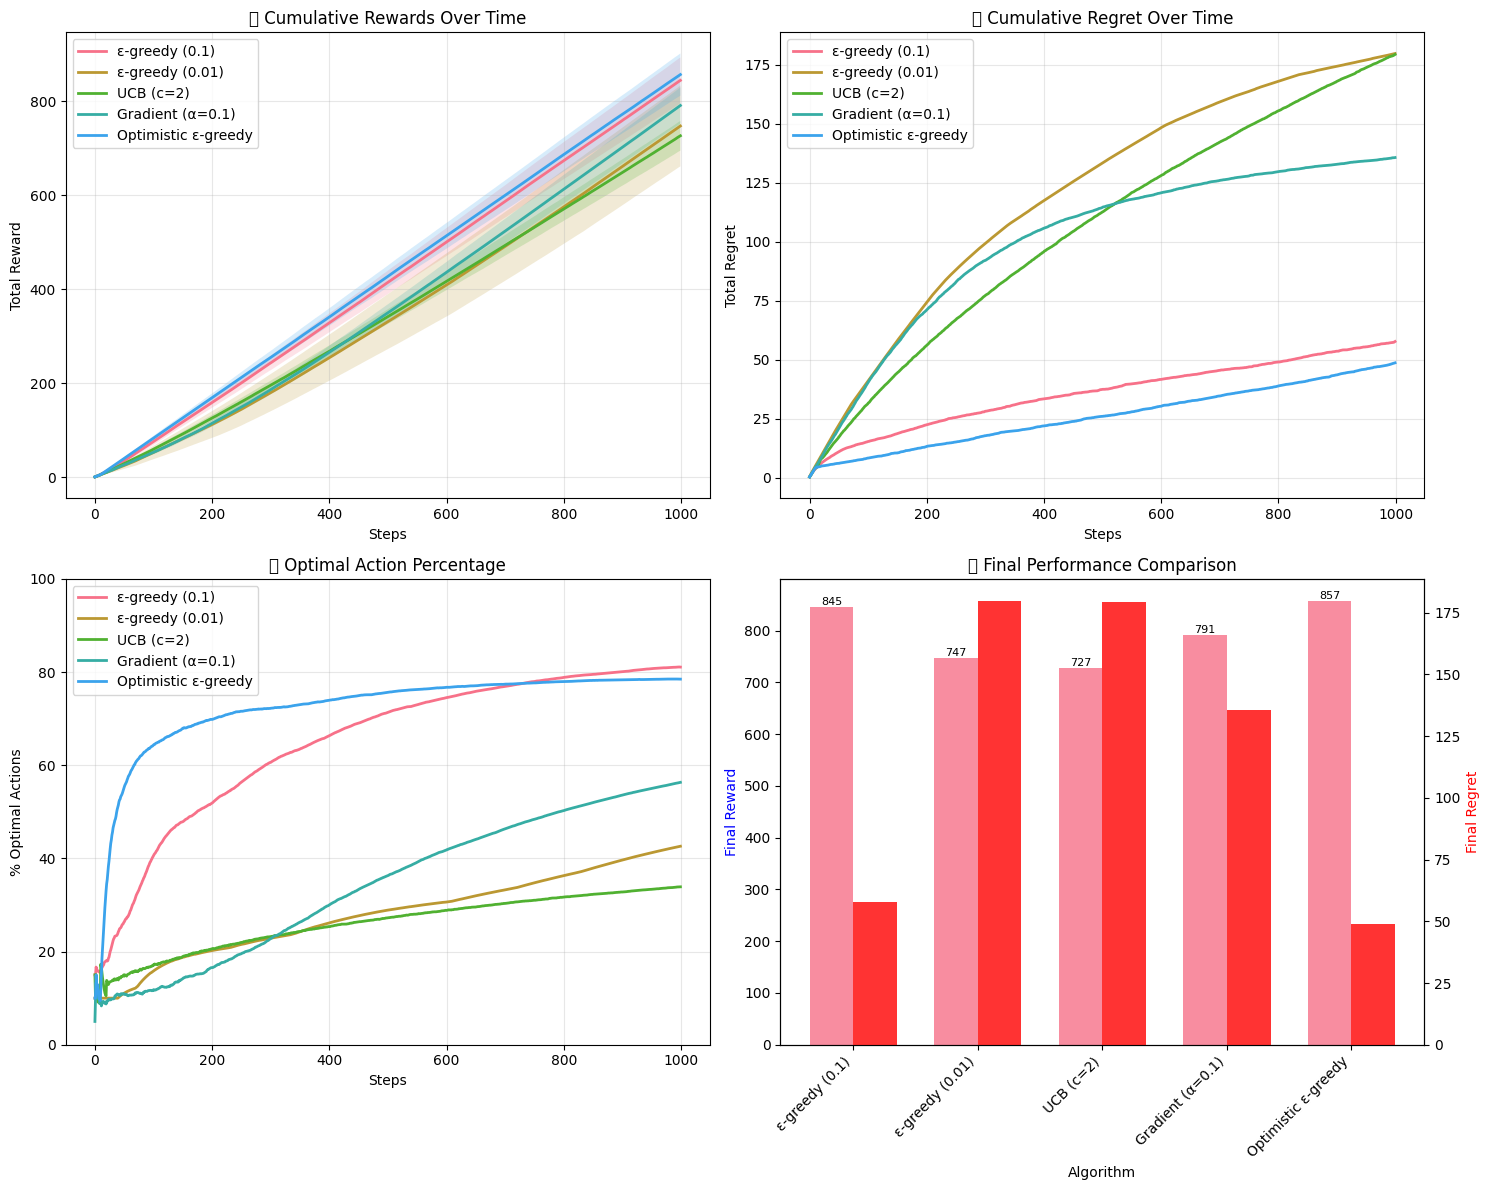

In [48]:
# ================================
# 📊 Part 8: Visualizing Results
# ================================

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Cumulative Rewards
ax1 = axes[0, 0]
for name, results in comparison_results.items():
    steps = range(len(results['avg_rewards']))
    ax1.plot(steps, results['avg_rewards'], label=name, linewidth=2)
    ax1.fill_between(steps,
                     results['avg_rewards'] - results['std_rewards']/2,
                     results['avg_rewards'] + results['std_rewards']/2,
                     alpha=0.2)

ax1.set_title('💰 Cumulative Rewards Over Time')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Total Reward')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Cumulative Regret
ax2 = axes[0, 1]
for name, results in comparison_results.items():
    ax2.plot(range(len(results['avg_regrets'])), results['avg_regrets'],
             label=name, linewidth=2)

ax2.set_title('📉 Cumulative Regret Over Time')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Total Regret')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Optimal Action Percentage
ax3 = axes[1, 0]
for name, results in comparison_results.items():
    optimal_pct = (results['avg_optimal'] / np.arange(1, len(results['avg_optimal']) + 1)) * 100
    ax3.plot(range(len(optimal_pct)), optimal_pct, label=name, linewidth=2)

ax3.set_title('🎯 Optimal Action Percentage')
ax3.set_xlabel('Steps')
ax3.set_ylabel('% Optimal Actions')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 100)

# Plot 4: Final Performance Summary
ax4 = axes[1, 1]
names = list(comparison_results.keys())
final_rewards = [comparison_results[name]['final_reward'] for name in names]
final_regrets = [comparison_results[name]['final_regret'] for name in names]

x = np.arange(len(names))
width = 0.35

bars1 = ax4.bar(x - width/2, final_rewards, width, label='Final Reward', alpha=0.8)
ax4_twin = ax4.twinx()
bars2 = ax4_twin.bar(x + width/2, final_regrets, width,
                     label='Final Regret', alpha=0.8, color='red')

ax4.set_xlabel('Algorithm')
ax4.set_ylabel('Final Reward', color='blue')
ax4_twin.set_ylabel('Final Regret', color='red')
ax4.set_title('🏆 Final Performance Comparison')
ax4.set_xticks(x)
ax4.set_xticklabels(names, rotation=45, ha='right')

# Add value labels on bars
for bar, value in zip(bars1, final_rewards):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{value:.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [49]:
# ================================
# 🎪 Part 9: Real-World Application - A/B Testing
# ================================

class ABTestingFramework:
    """
    Real-world application: A/B testing with bandits
    """

    def __init__(self, variants, algorithm='ucb'):
        """
        Args:
            variants: List of variant names
            algorithm: 'epsilon_greedy', 'ucb', or 'thompson'
        """
        self.variants = variants
        self.k = len(variants)
        self.algorithm = algorithm

        # Initialize bandit algorithm
        if algorithm == 'epsilon_greedy':
            self.agent = EpsilonGreedyAgent(self.k, epsilon=0.1)
        elif algorithm == 'ucb':
            self.agent = UCBAgent(self.k, c=2)
        elif algorithm == 'thompson':
            self.agent = ThompsonSamplingAgent(self.k)

        # Track results
        self.conversions = np.zeros(self.k)
        self.trials = np.zeros(self.k)
        self.history = []

    def show_variant(self, user_id):
        """Decide which variant to show to a user"""
        action = self.agent.choose_action()
        variant = self.variants[action]

        # Log the decision
        self.history.append({
            'user_id': user_id,
            'variant': variant,
            'action': action,
            'timestamp': len(self.history)
        })

        return variant, action

    def record_conversion(self, user_id, converted):
        """Record whether the user converted"""
        # Find the last decision for this user
        for record in reversed(self.history):
            if record['user_id'] == user_id and 'converted' not in record:
                action = record['action']
                record['converted'] = converted

                # Update our bandit algorithm
                reward = 1.0 if converted else 0.0
                self.agent.update(action, reward)

                # Update tracking
                self.trials[action] += 1
                if converted:
                    self.conversions[action] += 1

                break

    def get_results(self):
        """Get current A/B test results"""
        results = {}
        for i, variant in enumerate(self.variants):
            if self.trials[i] > 0:
                conversion_rate = self.conversions[i] / self.trials[i]
                # Calculate confidence interval
                se = np.sqrt(conversion_rate * (1 - conversion_rate) / self.trials[i])
                ci_lower = max(0, conversion_rate - 1.96 * se)
                ci_upper = min(1, conversion_rate + 1.96 * se)
            else:
                conversion_rate = 0
                ci_lower = ci_upper = 0

            results[variant] = {
                'trials': int(self.trials[i]),
                'conversions': int(self.conversions[i]),
                'conversion_rate': conversion_rate,
                'ci_lower': ci_lower,
                'ci_upper': ci_upper
            }

        return results

# Add Thompson Sampling for A/B testing
class ThompsonSamplingAgent:
    """
    Bayesian bandit using Beta-Bernoulli conjugate prior
    """

    def __init__(self, k):
        self.k = k
        self.reset()

    def reset(self):
        # Beta distribution parameters (successes + 1, failures + 1)
        self.alpha = np.ones(self.k)  # Successes + 1
        self.beta = np.ones(self.k)   # Failures + 1

    def choose_action(self):
        # Sample from posterior distributions
        samples = [np.random.beta(self.alpha[i], self.beta[i])
                  for i in range(self.k)]
        return np.argmax(samples)

    def update(self, action, reward):
        if reward > 0:
            self.alpha[action] += 1
        else:
            self.beta[action] += 1

# Demo A/B testing
print("\n🎪 REAL-WORLD A/B TESTING DEMO")
print("=" * 40)
print("Testing email subject lines for conversion rate:")

# Create A/B test
variants = [
    "🎉 Special Offer Inside!",
    "Don't Miss Out - Limited Time!",
    "Your Exclusive Deal Awaits"
]

# Simulate true conversion rates (unknown to our algorithm)
true_rates = [0.12, 0.15, 0.13]  # Variant B is actually best

ab_test = ABTestingFramework(variants, algorithm='thompson')

# Simulate users
print("\n📧 Simulating email campaign...")
n_users = 1000

for user_id in range(n_users):
    # Show variant to user
    variant, action = ab_test.show_variant(user_id)

    # Simulate conversion based on true rate
    converted = np.random.random() < true_rates[action]

    # Record result
    ab_test.record_conversion(user_id, converted)

# Show results
results = ab_test.get_results()
print("\n📊 A/B TEST RESULTS")
print("=" * 30)
for variant, stats in results.items():
    print(f"\n📧 {variant}")
    print(f"   Trials: {stats['trials']}")
    print(f"   Conversions: {stats['conversions']}")
    print(f"   Conversion Rate: {stats['conversion_rate']:.3f}")
    print(f"   95% CI: [{stats['ci_lower']:.3f}, {stats['ci_upper']:.3f}]")


🎪 REAL-WORLD A/B TESTING DEMO
Testing email subject lines for conversion rate:

📧 Simulating email campaign...

📊 A/B TEST RESULTS

📧 🎉 Special Offer Inside!
   Trials: 184
   Conversions: 18
   Conversion Rate: 0.098
   95% CI: [0.055, 0.141]

📧 Don't Miss Out - Limited Time!
   Trials: 444
   Conversions: 66
   Conversion Rate: 0.149
   95% CI: [0.116, 0.182]

📧 Your Exclusive Deal Awaits
   Trials: 372
   Conversions: 40
   Conversion Rate: 0.108
   95% CI: [0.076, 0.139]


In [50]:
# ================================
# 🎓 Part 10: Key Takeaways
# ================================

print("\n🎓 KEY TAKEAWAYS")
print("=" * 25)
print("✅ Multi-Armed Bandits teach us:")
print("   • Exploration vs Exploitation is fundamental to RL")
print("   • ε-greedy: Simple and effective")
print("   • UCB: Optimism in the face of uncertainty")
print("   • Gradient methods: Learn preferences, not values")
print("   • Thompson Sampling: Bayesian approach")
print()
print("✅ Real-world applications:")
print("   • A/B testing and website optimization")
print("   • Recommendation systems")
print("   • Online advertising")
print("   • Clinical trials")
print("   • Resource allocation")
print()
print("✅ Key insights:")
print("   • No single algorithm dominates all problems")
print("   • Initial exploration helps long-term performance")
print("   • Optimistic initialization encourages exploration")
print("   • Context matters (stationary vs non-stationary)")

print("\n🏆 CHALLENGES TO TRY")
print("=" * 25)
print("1. 🎯 Non-stationary bandits:")
print("   • Make the slot machine payouts change over time")
print("   • Implement sliding window or decay methods")
print()
print("2. 🎨 Contextual bandits:")
print("   • Add user features (age, location, etc.)")
print("   • Learn which ads work for which users")
print()
print("3. 📊 Advanced algorithms:")
print("   • Thompson Sampling with different priors")
print("   • LinUCB for linear rewards")
print("   • Neural bandits with deep learning")
print()
print("4. 🎪 Real applications:")
print("   • Restaurant menu optimization")
print("   • News article recommendation")
print("   • Drug dosage optimization")

print("\n🚀 NEXT UP: CHAPTER 3")
print("=" * 25)
print("Ready to tackle Markov Decision Processes?")
print("• States, actions, and policies")
print("• The Bellman equation")
print("• Planning vs learning")
print("• Grid worlds and dynamic programming")

print("\n" + "="*50)
print("🎰 Congratulations! You've mastered the bandits! 🎰")
print("="*50)


🎓 KEY TAKEAWAYS
✅ Multi-Armed Bandits teach us:
   • Exploration vs Exploitation is fundamental to RL
   • ε-greedy: Simple and effective
   • UCB: Optimism in the face of uncertainty
   • Gradient methods: Learn preferences, not values
   • Thompson Sampling: Bayesian approach

✅ Real-world applications:
   • A/B testing and website optimization
   • Recommendation systems
   • Online advertising
   • Clinical trials
   • Resource allocation

✅ Key insights:
   • No single algorithm dominates all problems
   • Initial exploration helps long-term performance
   • Optimistic initialization encourages exploration
   • Context matters (stationary vs non-stationary)

🏆 CHALLENGES TO TRY
1. 🎯 Non-stationary bandits:
   • Make the slot machine payouts change over time
   • Implement sliding window or decay methods

2. 🎨 Contextual bandits:
   • Add user features (age, location, etc.)
   • Learn which ads work for which users

3. 📊 Advanced algorithms:
   • Thompson Sampling with different p